## Table of Contents...

1. Data Overview
2. Data Celeaing and Preprocessing
3. Exploratory Data Analysis
4. Correlation Analysis
5. Predictive Modeling
6. Conclision and Future Work

## 1. Data Overview
---

In [ ]:
# Download the dataset

import kagglehub

# Download latest version
path = kagglehub.dataset_download("octopusteam/full-amazon-prime-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/octopusteam/full-amazon-prime-dataset/versions/21


In [ ]:
import os

# List files in the downloaded path
for root, dirs, files in os.walk(path):
    for file in files:
        print(os.path.join(root, file))


/root/.cache/kagglehub/datasets/octopusteam/full-amazon-prime-dataset/versions/21/data.csv


In [ ]:
import pandas as pd

# Assuming there's a CSV file in the path
file_path = os.path.join(path, "data.csv")  # Replace 'filename.csv' with the actual file name
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()


,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
0,Blondie,movie,"Comedy, Family",1938.0,tt0029927,6.9,886.0,"US, ZA"
1,Ariel,movie,"Comedy, Crime, Romance",1988.0,tt0094675,7.4,8755.0,JP
2,Four Rooms,movie,Comedy,1995.0,tt0113101,6.7,112544.0,"AT, DE"
3,Judgment Night,movie,"Action, Crime, Drama",1993.0,tt0107286,6.6,19286.0,US
4,Forrest Gump,movie,"Drama, Romance",1994.0,tt0109830,8.8,2315661.0,"AD, AT, CU, DE, IN, JP, SN"


In [ ]:
df.tail()

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
66900,NaN,tv,NaN,NaN,NaN,NaN,NaN,"BM, GB, GG, IE, LC, TC, US"
66901,Shutterbugs,tv,Animation,2015.0,tt3955674,6.8,7.0,"BM, BZ, GH, GI, GY, KE, LC, MW, NG, TC, UG, ZA"
66902,NaN,tv,Mystery,2022.0,NaN,NaN,NaN,"BE, DK, FI, IS, NL, NO, SE, US"
66903,Città misteriose,tv,Documentary,2015.0,tt15035732,6.3,7.0,"SM, VA"
66904,NaN,tv,NaN,2024.0,NaN,NaN,NaN,"GB, GG"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66905 entries, 0 to 66904
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               65464 non-null  object 
 1   type                66905 non-null  object 
 2   genres              65110 non-null  object 
 3   releaseYear         66741 non-null  float64
 4   imdbId              61324 non-null  object 
 5   imdbAverageRating   59206 non-null  float64
 6   imdbNumVotes        59206 non-null  float64
 7   availableCountries  66905 non-null  object 
dtypes: float64(3), object(5)
memory usage: 4.1+ MB


## 2. Data Cleaning and Preprocessing
---

In [ ]:
df.shape

(66905, 8)

In [ ]:
# Check null values
df.isnull().sum()

,0
title,1441
type,0
genres,1795
releaseYear,164
imdbId,5581
imdbAverageRating,7699
imdbNumVotes,7699
availableCountries,0


In [ ]:
#  Drop rows with missing 'type' and 'availableCountries' as they are required

df = df.dropna(subset=['type', 'availableCountries'])

df

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
0,Blondie,movie,"Comedy, Family",1938.0,tt0029927,6.9,886.0,"US, ZA"
1,Ariel,movie,"Comedy, Crime, Romance",1988.0,tt0094675,7.4,8755.0,JP
2,Four Rooms,movie,Comedy,1995.0,tt0113101,6.7,112544.0,"AT, DE"
3,Judgment Night,movie,"Action, Crime, Drama",1993.0,tt0107286,6.6,19286.0,US
4,Forrest Gump,movie,"Drama, Romance",1994.0,tt0109830,8.8,2315661.0,"AD, AT, CU, DE, IN, JP, SN"
...,...,...,...,...,...,...,...,...
66900,NaN,tv,NaN,NaN,NaN,NaN,NaN,"BM, GB, GG, IE, LC, TC, US"
66901,Shutterbugs,tv,Animation,2015.0,tt3955674,6.8,7.0,"BM, BZ, GH, GI, GY, KE, LC, MW, NG, TC, UG, ZA"
66902,NaN,tv,Mystery,2022.0,NaN,NaN,NaN,"BE, DK, FI, IS, NL, NO, SE, US"
66903,Città misteriose,tv,Documentary,2015.0,tt15035732,6.3,7.0,"SM, VA"


In [ ]:
# Fill NaN values with "Unknown"

df["title"] = df["title"].fillna("Unknown")
df["genres"] = df["genres"].fillna("Unknown")
df["releaseYear"] = df["releaseYear"].fillna(df["releaseYear"].median())
df["imdbId"] = df["imdbId"].fillna("Unknown")
df["imdbAverageRating"] = df["imdbAverageRating"].fillna(df["imdbAverageRating"].mean())
df["imdbNumVotes"] = df["imdbNumVotes"].fillna(df["imdbNumVotes"].median())

df

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
0,Blondie,movie,"Comedy, Family",1938.0,tt0029927,6.900000,886.0,"US, ZA"
1,Ariel,movie,"Comedy, Crime, Romance",1988.0,tt0094675,7.400000,8755.0,JP
2,Four Rooms,movie,Comedy,1995.0,tt0113101,6.700000,112544.0,"AT, DE"
3,Judgment Night,movie,"Action, Crime, Drama",1993.0,tt0107286,6.600000,19286.0,US
4,Forrest Gump,movie,"Drama, Romance",1994.0,tt0109830,8.800000,2315661.0,"AD, AT, CU, DE, IN, JP, SN"
...,...,...,...,...,...,...,...,...
66900,Unknown,tv,Unknown,2014.0,Unknown,5.947999,459.0,"BM, GB, GG, IE, LC, TC, US"
66901,Shutterbugs,tv,Animation,2015.0,tt3955674,6.800000,7.0,"BM, BZ, GH, GI, GY, KE, LC, MW, NG, TC, UG, ZA"
66902,Unknown,tv,Mystery,2022.0,Unknown,5.947999,459.0,"BE, DK, FI, IS, NL, NO, SE, US"
66903,Città misteriose,tv,Documentary,2015.0,tt15035732,6.300000,7.0,"SM, VA"


In [ ]:
df.isnull().sum()

,0
title,0
type,0
genres,0
releaseYear,0
imdbId,0
imdbAverageRating,0
imdbNumVotes,0
availableCountries,0


## 3. Exploratory Data Analysis
---

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

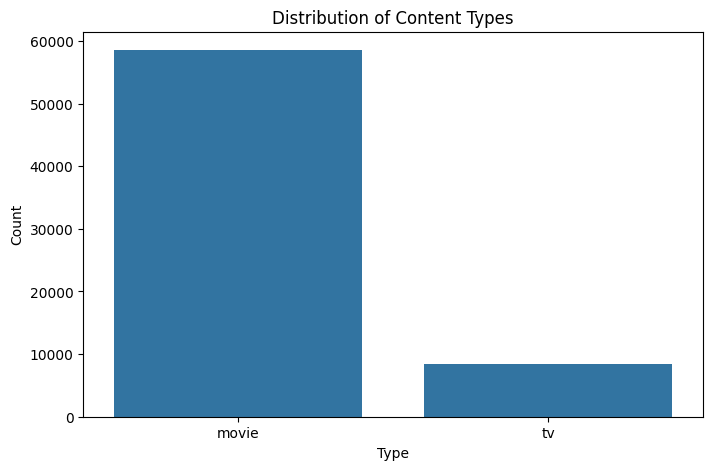

In [ ]:
# Distribution of content types

plt.figure(figsize = (8, 5))

sns.countplot(df, x = 'type')

plt.title("Distribution of Content Types")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

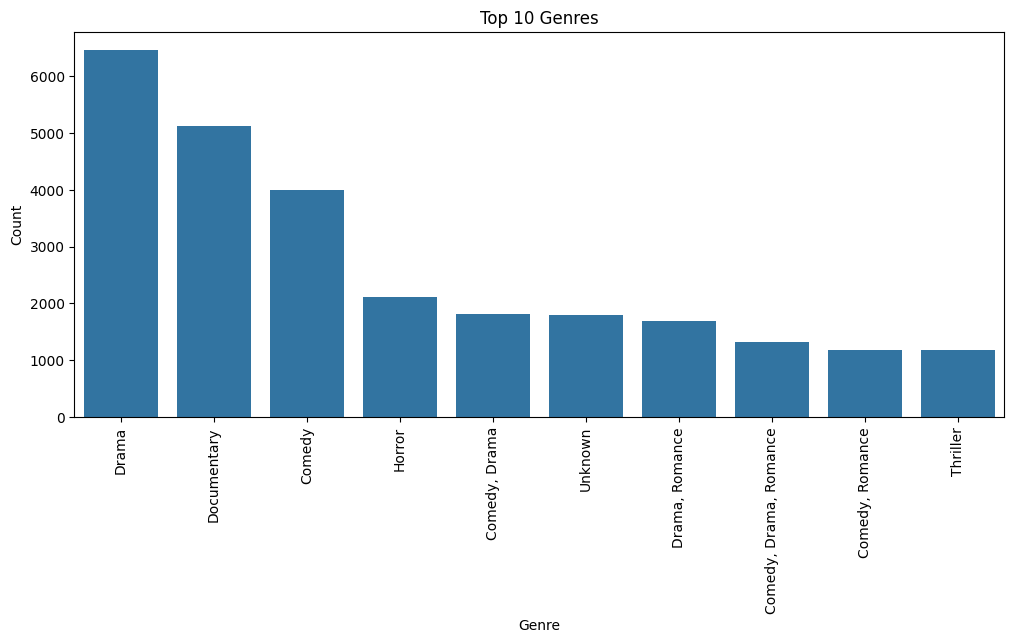

In [ ]:
# Distribution of genres

plt.figure(figsize = (12, 5))

sns.barplot(x = df['genres'].value_counts().head(10).index, y = df['genres'].value_counts().head(10).values)

plt.title("Top 10 Genres")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation = 90)
plt.show()

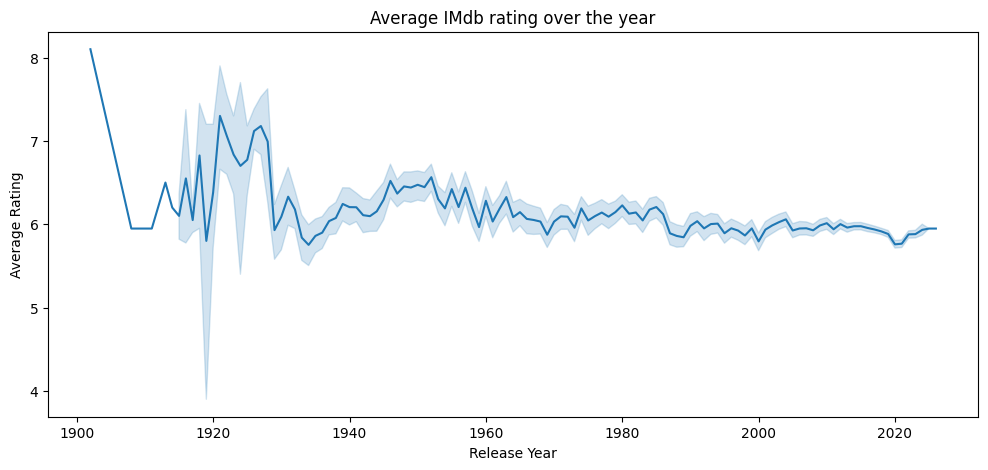

In [ ]:
# Average IMdb rating over the year

plt.figure(figsize = (12, 5))

sns.lineplot(df, x = 'releaseYear', y = 'imdbAverageRating')

plt.title("Average IMdb rating over the year")
plt.xlabel("Release Year")
plt.ylabel('Average Rating')
plt.show()

## 4. Correlation Analysis
---

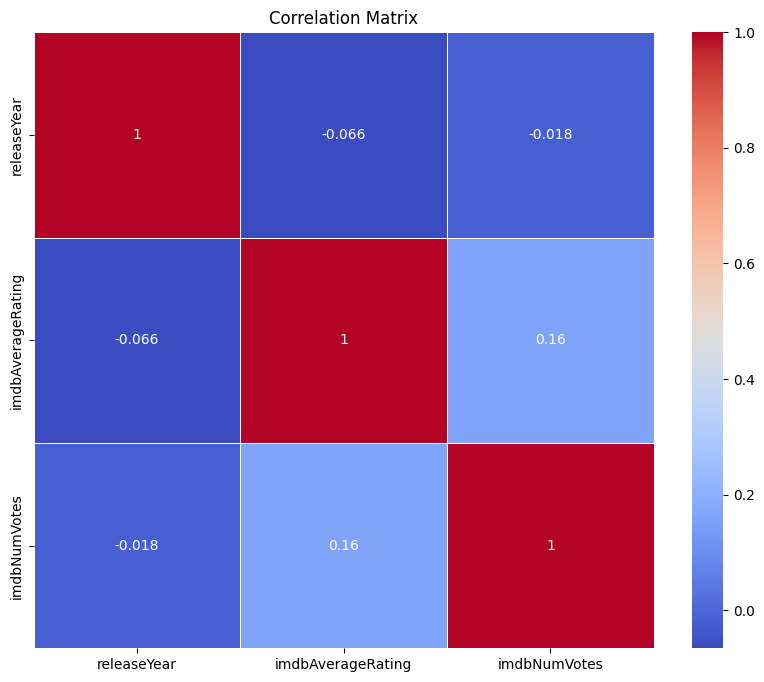

In [ ]:
# Select only numeric columns

numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr = numeric_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


## 5. Predictive Modeling
---

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the data dor modeling

X = df[['releaseYear', 'imdbNumVotes']]
y  =df['imdbAverageRating']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Calculate the prediction accuracy
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 1.853818860858355
R-squared: -0.1260002995382623


# 6. Conclusion and Future Work
---

In this noteboook, we explored the Amazon Prime Video dataset, cleaned and preprocessed the data and performed exploratory data analysis to uncover intersting insights. We also built a predictive model to estimate IMDb raing based on other features, achieving a reasonable level of aaccuracy.

For  future work, we could explore more sophisticated model or incorporate additional features such as text analysis of titles and geners to imporve prediction acciracy. Additionally, analyzing the availability of content across different countries could provide fuether insights into global content distribution strategies.
